# Geographical analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Maps visualisation
import geopandas as gpd
from geopandas import GeoDataFrame

# Dataframe
from shapely.geometry import Point, Polygon

## Importing and understanding database

In [2]:
crimes = pd.read_csv("/Users/oleoaraujo/Desktop/Crimes-in-Chicago/Crimes_-_2016_to_2020.csv")

In [3]:
crimes.head(20)

,ID,Case Number,Date,Block,Crime_Type,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,MISDEMEANOR,THEFT,OVER $500,RESIDENCE,0,1,631,6.0,8.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
1,11645836,JC212333,2016-05-01 00:25:00,055XX S ROCKWELL ST,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,0,0,824,8.0,15.0,63.0,2016,2019-04-06 16:04:43,NaN,NaN,NaN
2,12014684,JD189901,2020-03-17 21:30:00,039XX N LECLAIRE AVE,MISDEMEANOR,THEFT,$500 AND UNDER,STREET,0,0,1634,16.0,45.0,15.0,2020,2020-03-25 15:45:43,41.952052,-87.754660,"(41.952051946, -87.754660372)"
3,11645648,JC212959,2018-01-01 08:00:00,024XX N MONITOR AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,0,0,2515,25.0,30.0,19.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
4,11864018,JC476123,2019-09-24 08:00:00,022XX S MICHIGAN AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,0,0,132,1.0,3.0,33.0,2019,2019-10-20 15:56:02,41.852248,-87.623786,"(41.852248185, -87.623786256)"
5,11859805,JC471592,2019-10-13 20:30:00,024XX W CHICAGO AVE,MISDEMEANOR,THEFT,RETAIL THEFT,GROCERY FOOD STORE,0,0,1221,12.0,26.0,24.0,2019,2019-10-20 16:03:03,41.895732,-87.687784,"(41.895732399, -87.687784384)"
6,11645959,JC211511,2018-12-20 16:00:00,045XX N ALBANY AVE,INFRACTION,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,0,0,1724,17.0,33.0,14.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
7,11645557,JC212685,2018-04-01 00:01:00,080XX S VERNON AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,0,0,631,6.0,6.0,44.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
8,11646293,JC213749,2018-12-20 15:00:00,023XX N LOCKWOOD AVE,MISDEMEANOR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,0,0,2515,25.0,36.0,19.0,2018,2019-04-06 16:04:43,NaN,NaN,NaN
9,12012127,JD189186,2020-03-18 02:03:00,039XX W JACKSON BLVD,MISDEMEANOR,MOTOR VEHICLE THEFT,AUTOMOBILE,APARTMENT,0,1,1132,11.0,28.0,26.0,2020,2020-03-25 15:47:29,41.877110,-87.723990,"(41.877110187, -87.723989719)"


In [4]:
crimes.set_index(crimes.ID, inplace=True)

In [5]:
crimes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1277232.0,NaN,NaN,NaN,11302467.393457,783643.814895,22245.0,10882663.75,11333324.5,11784053.25,12305810.0
Case Number,1277232,1277072,HZ140230,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,1277232,589815,2016-01-01 00:01:00,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block,1277232,34700,001XX N STATE ST,4326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crime_Type,1277094,4,MISDEMEANOR,626741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Primary Type,1277232,32,THEFT,294745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,1277232,491,SIMPLE,140645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Description,1271428,190,STREET,286880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrest,1277232.0,NaN,NaN,NaN,0.194647,0.395929,0.0,0.0,0.0,0.0,1.0
Domestic,1277232.0,NaN,NaN,NaN,0.166526,0.372552,0.0,0.0,0.0,0.0,1.0


In [6]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
Crime_Type               object
Primary Type             object
Description              object
Location Description     object
Arrest                    int64
Domestic                  int64
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [7]:
# Define "Date" and "Updated on" columns as datetime type
crimes.Date = pd.to_datetime(crimes.Date)
crimes["Updated On"] = pd.to_datetime(crimes["Updated On"])

crimes.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
Crime_Type                      object
Primary Type                    object
Description                     object
Location Description            object
Arrest                           int64
Domestic                         int64
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

## Importing Chicago Maps

In [8]:
chicago_geo = gpd.read_file('Chicago - Community Areas/geo_export_47927303-22ce-4ba2-9ded-092e5c8390c3.shp')

In [9]:
chicago_geo.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [ ]:
chicago_map = chicago_geo.plot(figsize=(16,16), edgecolor='k', cmap='nipy_spectral', alpha=0.5, linewidth=2) 
chicago_geo.apply(lambda x: chicago_map.annotate(s=x.community, xy=x.geometry.centroid.coords[0], ha='center', size=8),axis=1);
chicago_map.set_axis_off()

<AxesSubplot:>

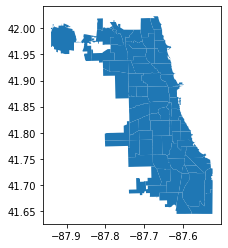

In [11]:
chicago_geo.plot()

In [ ]:
# Testing another type of plot for the Chicago Map
import geoplot
#plt.figure(figsize=(16,10))
geoplot.polyplot(chicago_geo, figsize=(10, 10))
#chicago_geo.plot()

In [13]:
# Creating Geopandas DataFrame for the known points of our database
chicago_crimes = gpd.GeoDataFrame(crimes, geometry=gpd.points_from_xy(crimes.Longitude, crimes.Latitude))

<AxesSubplot:>

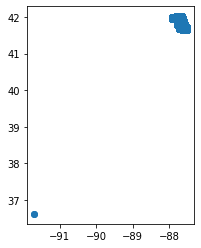

In [14]:
# Ploting the geopandas created, we may notice some points with errors in Latitude and Longitude
chicago_crimes.plot()

<AxesSubplot:>

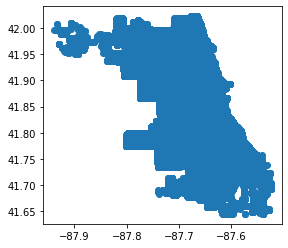

In [15]:
# Cleaning the Latitude and Longitude
chicago_crimes.dropna(inplace=True)
chicago_crimes = chicago_crimes[(chicago_crimes.Latitude>41.0)&(chicago_crimes.Longitude>-89.0)]
chicago_crimes.plot()

### Plotting both graphs together

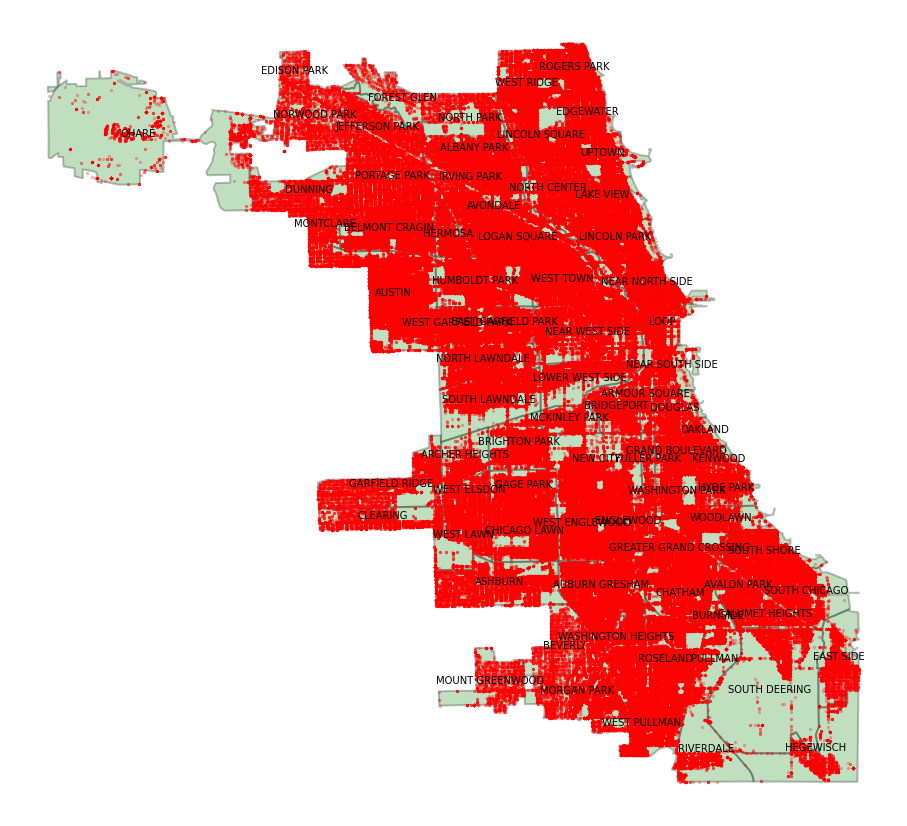

In [16]:
chicago_map = chicago_geo.plot(figsize=(16,16), edgecolor='k', facecolor='g', alpha=0.25, linewidth=2) 
chicago_geo.apply(lambda x: chicago_map.annotate(text=x.community, xy=x.geometry.centroid.coords[0], ha='center', size=10),axis=1);
chicago_crimes.plot(figsize=(16,16),ax=chicago_map, markersize=5, color='r', alpha=0.25)
chicago_map.set_axis_off()

In [17]:
import mplleaflet

ModuleNotFoundError: No module named 'mplleaflet'